# Notation

- Let $p$ represent a number of games
- Let $q$ represent a number of castles
- Let $2^r$ represent the maximum number of troops per castle


Say we have a file


\begin{bmatrix}
[n_{11} & \ldots & n_{1q}], \\
\vdots & \ddots & \vdots \\
[n_{p1} & \ldots & n_{pq}]
\end{bmatrix}

We will have to store $p$ rows of games, for $q$ columns of castles, each having an entry that can be represented in $r$ bits. The number of kilobytes it takes to store that file will be $\frac{r \times p \times q}{8}$.



Note to compute the maximum number of games, you must calculate: $\frac{ (2^{r} + q - 1)! }{ (2^{r})! \times (q - 1)! }$







In [20]:
number_of_soldiers = 7  # 2^r where r = number_of_soldiers
max_games = max_number_of_games(number_of_soldiers, 10)
print(max_games)

35823246375345.0


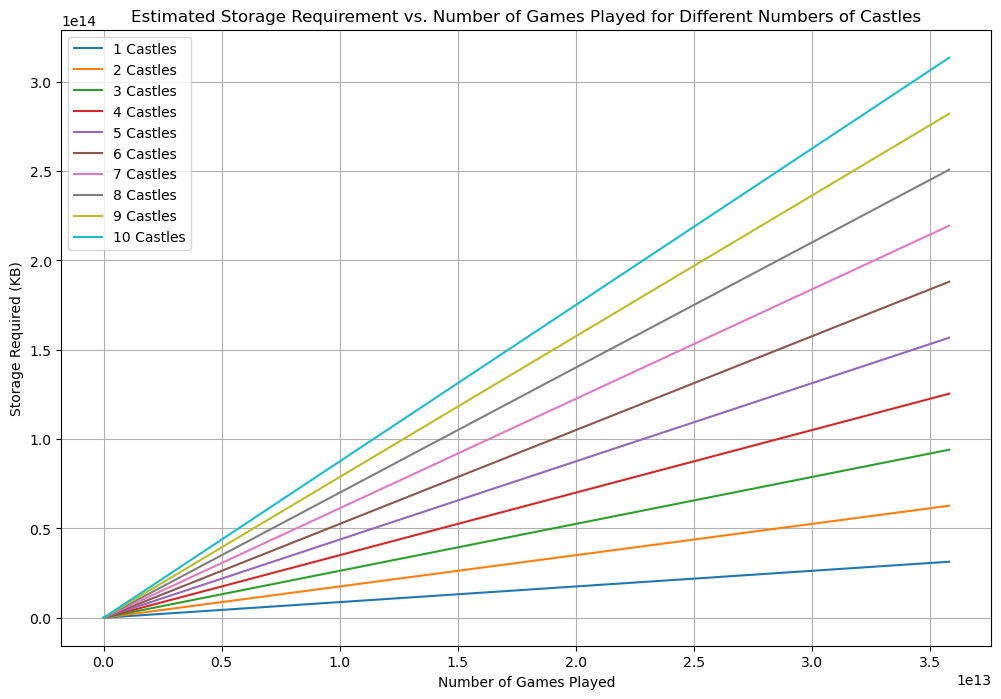

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

def max_number_of_games(number_of_soldiers, number_of_castles):
    numerator = math.factorial(2 ** number_of_soldiers + number_of_castles - 1)
    denominator = math.factorial(2 ** number_of_soldiers) * math.factorial(number_of_castles - 1)
    return numerator / denominator

def compute_storage(number_of_soldiers, number_of_castles, number_of_games):
    return (number_of_soldiers * number_of_castles * number_of_games) / 8  # in kilobytes

# represent in powers of two (2^r, let number_of_solders = r )
number_of_soldiers = 7  
max_games = max_number_of_games(number_of_soldiers, 10) 



# max_games_per_castle = [max_number_of_games(number_of_soldiers, castles) for castles in castles_range]

# create a range at intervals of 100 of the number of games played
games = np.linspace(1, max_games, 100)  
castles_range = range(1, 11)

# 12x8 figure
plt.figure(figsize=(12, 8))

for castles in castles_range:
    storage = [compute_storage(number_of_soldiers, castles, g) for g in games]
    plt.plot(games, storage, label=f'{castles} Castles')

plt.xlabel('Number of Games Played')
plt.ylabel('Storage Required (KB)')
plt.title('Estimated Storage Requirement vs. Number of Games Played for Different Numbers of Castles')
plt.legend()
plt.grid(True)
plt.show()


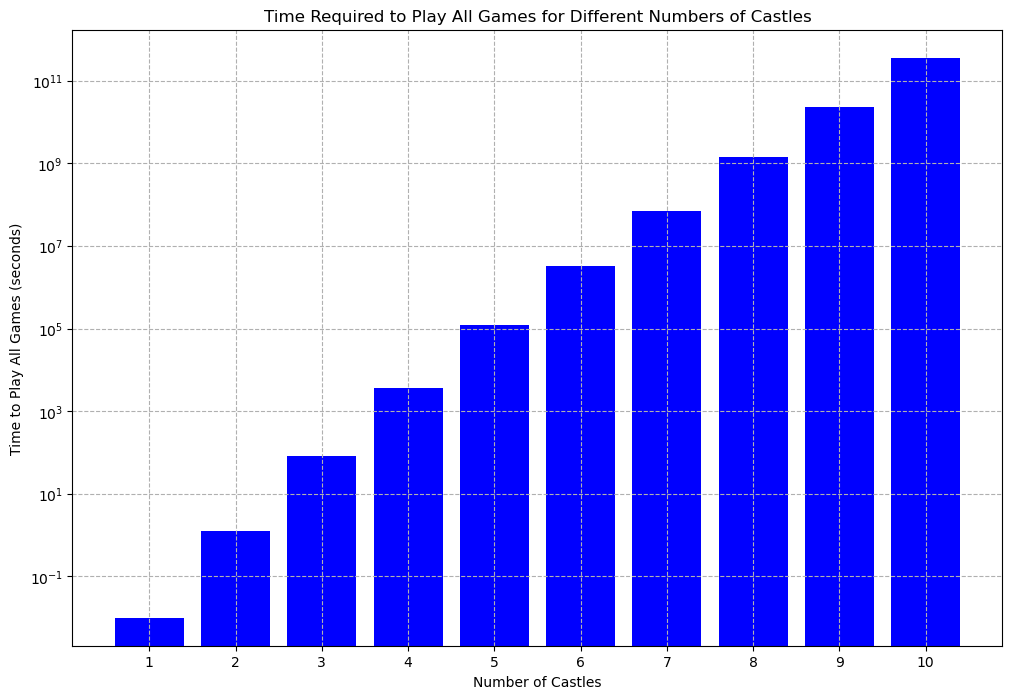

In [17]:
# make an array of the maximum number of castles per game
max_games_per_castle = [max_number_of_games(number_of_soldiers, castles) for castles in castles_range]
# since each game is estimated to take one second
# then we can just pass the number of games into 
# a list of the time it takes for each castle
# but otherwise we can multiply `games` here by a constant
time_to_play = [games for games in max_games_per_castle]  


plt.figure(figsize=(12, 8))
plt.bar(castles_range, time_to_play, color='blue')

plt.xlabel('Number of Castles')
plt.ylabel('Time to Play All Games (seconds)')
plt.title('Time Required to Play All Games for Different Numbers of Castles')
plt.xticks(castles_range)
# logarithmic scale
plt.yscale('log')  
plt.grid(True, which="both", ls="--")

plt.show()



In [1]:
(7*2*100)/8

1400

In [4]:
1400**2/(10**6)

1.96